In [1]:
import pandas as pd

# 학습 데이터 로드
train_df = pd.read_csv("train.csv")

# 상위 5개 행 확인
train_df.head()


,ID,Age,Gender,Country,Race,Family_Background,Radiation_History,Iodine_Deficiency,Smoke,Weight_Risk,Diabetes,Nodule_Size,TSH_Result,T4_Result,T3_Result,Cancer
0,TRAIN_00000,80,M,CHN,ASN,Positive,Exposed,Sufficient,Non-Smoker,Not Obese,No,0.650355,2.784735,6.744603,2.575820,1
1,TRAIN_00001,37,M,NGA,ASN,Positive,Unexposed,Sufficient,Smoker,Obese,No,2.950430,0.911624,7.303305,2.505317,1
2,TRAIN_00002,71,M,CHN,MDE,Positive,Unexposed,Sufficient,Non-Smoker,Not Obese,Yes,2.200023,0.717754,11.137459,2.381080,0
3,TRAIN_00003,40,F,IND,HSP,Negative,Unexposed,Sufficient,Non-Smoker,Obese,No,3.370796,6.846380,10.175254,0.753023,0
4,TRAIN_00004,53,F,CHN,CAU,Negative,Unexposed,Sufficient,Non-Smoker,Not Obese,No,4.230048,0.439519,7.194450,0.569356,1


In [44]:
import pandas as pd

# 학습 데이터 로드
test_df = pd.read_csv("test.csv")

# 상위 5개 행 확인
test_df.head()

,ID,Age,Gender,Country,Race,Family_Background,Radiation_History,Iodine_Deficiency,Smoke,Weight_Risk,Diabetes,Nodule_Size,TSH_Result,T4_Result,T3_Result
0,TEST_00000,53,M,NGA,CAU,Negative,Unexposed,Sufficient,Non-Smoker,Not Obese,No,2.940678,6.434501,9.227958,2.733846
1,TEST_00001,46,M,KOR,MDE,Negative,Unexposed,Deficient,Smoker,Obese,No,3.450129,4.729535,5.937664,0.775012
2,TEST_00002,78,F,IND,ASN,Negative,Exposed,Sufficient,Non-Smoker,Obese,No,4.680720,5.663475,10.455964,1.259896
3,TEST_00003,69,F,KOR,CAU,Negative,Unexposed,Sufficient,Non-Smoker,Not Obese,No,4.280588,7.473752,8.785335,2.826138
4,TEST_00004,77,F,KOR,CAU,Positive,Unexposed,Sufficient,Non-Smoker,Obese,No,3.380094,7.099987,8.737063,3.453563


In [4]:
# cancer_detection_pipeline.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리
def preprocess(df):
    df = df.copy()
    label_cols = df.select_dtypes(include='object').columns
    le_dict = {}
    for col in label_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        le_dict[col] = le
    return df, le_dict

train_x = train.drop(['ID', 'Cancer'], axis=1)
train_y = train['Cancer']
train_x, label_encoders = preprocess(train_x)

# 테스트 데이터에도 동일한 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
for col, le in label_encoders.items():
    test_x[col] = le.transform(test_x[col])

# 3. 습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.2, random_state=42, stratify=train_y
)

# 4. 모델 학습
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# 5. 검증
val_preds = model.predict(X_val)
f1 = f1_score(y_val, val_preds)
print("Validation F1 Score:", round(f1, 4))

# 6. 테스트 데이터 예측 및 제출 파일 저장
test_preds = model.predict(test_x)
submission['Cancer'] = test_preds
submission.to_csv('submission.csv', index=False)


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463
Validation F1 Score: 0.2901


In [7]:
# cancer_detection_pipeline.py
# Private 제출용 코드
# 모델: LGBMClassifier + class_weight + F1 최적화
# 경로: /data 기준
# 개발환경: Python 3.9, LightGBM 4.2.0, scikit-learn 1.3.0
# 코드 인코딩: UTF-8

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 함수 정의
def preprocess(df):
    df = df.copy()
    label_cols = df.select_dtypes(include='object').columns
    le_dict = {}
    for col in label_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        le_dict[col] = le
    return df, le_dict

# 3. 훈련 데이터 준비
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_y = train['Cancer']
train_x, label_encoders = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
for col, le in label_encoders.items():
    test_x[col] = le.transform(test_x[col])

# 5. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.2, random_state=42, stratify=train_y
)

# 6. 커스텀 F1 스코어 함수 정의
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return 'f1', f1_score(y_true, y_pred_binary), True

# 7. 모델 학습
model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',         # 클래스 불균형 대응
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1
)

from lightgbm import early_stopping, log_evaluation

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=lgb_f1_score,
    callbacks=[
        early_stopping(50),
        log_evaluation(100)
    ]
)


# 8. 검증 점수 출력
val_preds = model.predict(X_val)
val_f1 = f1_score(y_val, val_preds)
print("Validation F1 Score:", round(val_f1, 4))

# 9. 테스트 데이터 예측 및 제출
test_preds = model.predict(test_x)
submission['Cancer'] = test_preds
submission.to_csv('submission2.csv', index=False)



[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.55331	valid_0's f1: 0.466397
Early stopping, best iteration is:
[52]	valid_0's binary_logloss: 0.559417	valid_0's f1: 0.466869
Validation F1 Score: 0.4669


In [12]:
# cancer_detection_pipeline_optimized.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 + Feature Engineering 함수 정의
def preprocess(df):
    df = df.copy()

    # 수치형 Feature Engineering 예시
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)

    return df

# 3. 훈련 데이터 준비
train_y = train['Cancer']
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_x = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
test_x = preprocess(test_x)

# 5. 카테고리형 컬럼 지정 (문자형인 열들)
cat_cols = train_x.select_dtypes(include='object').columns.tolist()

# 6. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.2, random_state=42, stratify=train_y
)

# 7. 커스텀 F1 스코어 함수 정의
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return 'f1', f1_score(y_true, y_pred_binary), True

# 8. 모델 학습
model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=lgb_f1_score,
    callbacks=[early_stopping(50), log_evaluation(100)],
    categorical_feature=cat_cols
)

# 9. Threshold 튜닝을 통한 F1 최적화
val_probs = model.predict_proba(X_val)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_val, val_probs)
f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
best_thresh = thresholds[np.argmax(f1s)]
print(f"Best Threshold: {best_thresh:.4f}")

val_preds = (val_probs > best_thresh).astype(int)
val_f1 = f1_score(y_val, val_preds)
print("Optimized Validation F1 Score:", round(val_f1, 4))

# 10. 테스트 데이터 예측 및 제출 파일 생성
test_probs = model.predict_proba(test_x)[:, 1]
test_preds = (test_probs > best_thresh).astype(int)
submission['Cancer'] = test_preds
submission.to_csv('submission4.csv', index=False)


ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: Gender: object, Country: object, Race: object, Family_Background: object, Radiation_History: object, Iodine_Deficiency: object, Smoke: object, Weight_Risk: object, Diabetes: object

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 + Feature Engineering 함수 정의
def preprocess(df):
    df = df.copy()

    # 수치형 Feature Engineering
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)

    # 범주형 변수 object -> category 변환
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

    return df

# 3. 훈련 데이터 준비
train_y = train['Cancer']
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_x = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
test_x = preprocess(test_x)

# 5. 카테고리형 컬럼 추출
cat_cols = train_x.select_dtypes(include='category').columns.tolist()

# 6. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.2, random_state=42, stratify=train_y
)

# 7. 커스텀 F1 스코어 함수 정의
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return 'f1', f1_score(y_true, y_pred_binary), True

# 8. 모델 정의 및 학습
model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=1000,
    learning_rate=0.05,
    n_jobs=-1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=lgb_f1_score,
    callbacks=[early_stopping(50), log_evaluation(100)],
    categorical_feature=cat_cols
)

# 9. Threshold 튜닝을 통한 F1 최적화
val_probs = model.predict_proba(X_val)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_val, val_probs)
f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
best_thresh = thresholds[np.argmax(f1s)]
print(f"Best Threshold: {best_thresh:.4f}")

val_preds = (val_probs > best_thresh).astype(int)
val_f1 = f1_score(y_val, val_preds)
print("Optimized Validation F1 Score:", round(val_f1, 4))

# 10. 테스트 데이터 예측 및 제출 파일 생성
test_probs = model.predict_proba(test_x)[:, 1]
test_preds = (test_probs > best_thresh).astype(int)

submission['Cancer'] = test_preds
submission.to_csv('submission4.csv', index=False)


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1896
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.551795	valid_0's f1: 0.466465
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.558458	valid_0's f1: 0.467881
Best Threshold: 0.7111
Optimized Validation F1 Score: 0.4676


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 + Feature Engineering 함수 정의
def preprocess(df):
    df = df.copy()

    # 수치형 Feature Engineering
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)
    df['TSH_T4_ratio'] = df['TSH_Result'] / (df['T4_Result'] + 1e-6)  # 추가 피처 엔지니어링

    # 범주형 변수 object -> category 변환
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

    return df

# 3. 훈련 데이터 준비
train_y = train['Cancer']
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_x = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
test_x = preprocess(test_x)

# 5. 카테고리형 컬럼 추출
cat_cols = train_x.select_dtypes(include='category').columns.tolist()

# 6. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.2, random_state=42, stratify=train_y
)

# 7. 커스텀 F1 스코어 함수 정의
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return 'f1', f1_score(y_true, y_pred_binary), True

# 8. 모델 정의 및 하이퍼파라미터 튜닝을 위한 GridSearchCV
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [1000, 1500, 2000]
}

model = LGBMClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")

# 9. 최적의 파라미터로 모델 학습
best_model = grid_search.best_estimator_

# 10. 모델 학습
best_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=lgb_f1_score,
    callbacks=[early_stopping(50), log_evaluation(100)],
    categorical_feature=cat_cols
)

# 11. Threshold 튜닝을 통한 F1 최적화
val_probs = best_model.predict_proba(X_val)[:, 1]
prec, rec, thresholds = precision_recall_curve(y_val, val_probs)
f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
best_thresh = thresholds[np.argmax(f1s)]
print(f"Best Threshold: {best_thresh:.4f}")

val_preds = (val_probs > best_thresh).astype(int)
val_f1 = f1_score(y_val, val_preds)
print("Optimized Validation F1 Score:", round(val_f1, 4))

# 12. 앙상블 모델 (LightGBM + 다른 모델) 적용 (Optional)
# LightGBM과 다른 모델을 앙상블할 경우, 예를 들어 XGBoost나 다른 분류기를 추가할 수 있습니다.

# 13. 테스트 데이터 예측 및 제출 파일 생성
test_probs = best_model.predict_proba(test_x)[:, 1]
test_preds = (test_probs > best_thresh).astype(int)

submission['Cancer'] = test_preds
submission.to_csv('submission_optimized.csv', index=False)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2151
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Best parameters found: {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 1000, 'num_leaves': 31}
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `for

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
import os

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 및 Feature Engineering 함수 정의
def preprocess(df):
    df = df.copy()

    # 수치형 Feature Engineering
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)  # TSH와 T3의 비율
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)  # T4와 T3의 비율
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)  # 결절 크기와 TSH의 비율

    # 범주형 변수 object -> category로 변환
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

    return df

# 3. 훈련 데이터 준비
train_y = train['Cancer']
train_x = train.drop(['ID', 'Cancer'], axis=1)
train_x = preprocess(train_x)

# 4. 테스트 데이터 전처리
test_ids = test['ID']
test_x = test.drop(['ID'], axis=1)
test_x = preprocess(test_x)

# 5. 카테고리형 변수 추출
cat_cols = train_x.select_dtypes(include='category').columns.tolist()

# 6. 학습/검증 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    train_x, train_y, test_size=0.2, random_state=42, stratify=train_y
)

# 7. 커스텀 F1 스코어 함수 정의
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)  # 예측값을 0 또는 1로 이진화
    return 'f1', f1_score(y_true, y_pred_binary), True

# 8. 모델 정의 및 학습
model = LGBMClassifier(
    random_state=42,
    class_weight='balanced',  # 불균형 클래스에 가중치를 부여
    n_estimators=1000,  # 트리의 개수
    learning_rate=0.05,  # 학습률
    n_jobs=-1  # 병렬 처리
)

# 모델 학습
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=lgb_f1_score,  # F1 스코어를 평가 지표로 사용
    callbacks=[early_stopping(50), log_evaluation(100)],  # 조기 종료 및 로그 출력
    categorical_feature=cat_cols  # 카테고리형 변수 지정
)

# 9. Threshold 튜닝을 통한 F1 최적화
val_probs = model.predict_proba(X_val)[:, 1]  # 예측 확률 가져오기
prec, rec, thresholds = precision_recall_curve(y_val, val_probs)  # Precision-Recall 커브
f1s = 2 * (prec * rec) / (prec + rec + 1e-6)  # F1 스코어 계산
best_thresh = thresholds[np.argmax(f1s)]  # 최적의 threshold 찾기
print(f"Best Threshold: {best_thresh:.4f}")

# 최적 threshold에 따른 예측
val_preds = (val_probs > best_thresh).astype(int)
val_f1 = f1_score(y_val, val_preds)  # 최적화된 F1 스코어 계산
print("Optimized Validation F1 Score:", round(val_f1, 4))

# 10. 테스트 데이터 예측 및 제출 파일 생성
test_probs = model.predict_proba(test_x)[:, 1]
test_preds = (test_probs > best_thresh).astype(int)

submission['Cancer'] = test_preds
submission.to_csv('submission5.csv', index=False)


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1896
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.551795	valid_0's f1: 0.466465
Early stopping, best iteration is:
[54]	valid_0's binary_logloss: 0.558458	valid_0's f1: 0.467881
Best Threshold: 0.7111
Optimized Validation F1 Score: 0.4676


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_recall_curve
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

# 1. 데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 2. 전처리 및 Feature Engineering 함수
def preprocess(df):
    df = df.copy()
    # 비율 기반 Feature
    df['TSH_T3_ratio'] = df['TSH_Result'] / (df['T3_Result'] + 1e-6)
    df['T4_T3_ratio'] = df['T4_Result'] / (df['T3_Result'] + 1e-6)
    df['Nodule_TSH_ratio'] = df['Nodule_Size'] / (df['TSH_Result'] + 1e-6)
    
    # 호르몬 수치 통계 Feature
    df['hormone_sum'] = df['TSH_Result'] + df['T3_Result'] + df['T4_Result']
    df['hormone_mean'] = df[['TSH_Result', 'T3_Result', 'T4_Result']].mean(axis=1)
    df['hormone_std'] = df[['TSH_Result', 'T3_Result', 'T4_Result']].std(axis=1)

    # 이상치 여부
    df['TSH_outlier'] = (df['TSH_Result'] > df['TSH_Result'].quantile(0.95)).astype(int)
    df['T3_outlier'] = (df['T3_Result'] < df['T3_Result'].quantile(0.05)).astype(int)

    # 범주형 변환
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

    return df

# 3. 훈련 및 테스트 데이터 전처리
train_y = train['Cancer']
train_x = preprocess(train.drop(['ID', 'Cancer'], axis=1))
test_ids = test['ID']
test_x = preprocess(test.drop(['ID'], axis=1))

cat_cols = train_x.select_dtypes(include='category').columns.tolist()

# 4. F1 커스텀 평가 함수
def lgb_f1_score(y_true, y_pred):
    y_pred_binary = (y_pred > 0.5).astype(int)
    return 'f1', f1_score(y_true, y_pred_binary), True

# 5. Stratified K-Fold 학습
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
val_probs_all = np.zeros(len(train_x))
test_probs_all = np.zeros(len(test_x))

for train_idx, val_idx in skf.split(train_x, train_y):
    X_tr, X_val = train_x.iloc[train_idx], train_x.iloc[val_idx]
    y_tr, y_val = train_y.iloc[train_idx], train_y.iloc[val_idx]

    model = LGBMClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=2000,
        learning_rate=0.03,
        max_depth=7,
        num_leaves=31,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1.0,
        reg_lambda=1.0,
        n_jobs=-1
    )

    model.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        eval_metric=lgb_f1_score,
        callbacks=[early_stopping(50), log_evaluation(100)],
        categorical_feature=cat_cols
    )

    val_probs_all[val_idx] = model.predict_proba(X_val)[:, 1]
    test_probs_all += model.predict_proba(test_x)[:, 1] / skf.n_splits

# 6. 최적 Threshold 계산
prec, rec, thresholds = precision_recall_curve(train_y, val_probs_all)
f1s = 2 * (prec * rec) / (prec + rec + 1e-6)
best_thresh = thresholds[np.argmax(f1s)]
print(f"Best Threshold (CV): {best_thresh:.4f}")
print(f"Best F1 Score (CV): {np.max(f1s):.4f}")

# 7. 예측 및 제출
test_preds = (test_probs_all > best_thresh).astype(int)
submission['Cancer'] = test_preds
submission.to_csv('submission6.csv', index=False)


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2666
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.560565	valid_0's f1: 0.484195
Early stopping, best iteration is:
[101]	valid_0's binary_logloss: 0.560407	valid_0's f1: 0.484316
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003404 seconds.
You can set `force_row_wise=true` to remove t

아래의 코드들을 아직 못 올림 
횟수가 다차서 내일 올리겠습니다.

In [45]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from lightgbm import early_stopping, log_evaluation

# 데이터 로딩
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# 컬럼 이름 공백 제거
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

# 범주형 변수 라벨 인코딩
cat_cols = ['Gender', 'Country', 'Race', 'Family_Background',
            'Radiation_History', 'Iodine_Deficiency', 'Smoke',
            'Weight_Risk', 'Diabetes']

for col in cat_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]]))  # train과 test 모두에 적용
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

# 피처와 타겟 분리
X = train.drop(['ID', 'Cancer'], axis=1)
y = train['Cancer']
X_test = test.drop(['ID'], axis=1)

# 모델 학습 및 예측
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
test_preds = np.zeros(X_test.shape[0])
thresholds = []
f1_scores = []

for train_idx, valid_idx in skf.split(X, y):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    model = lgb.LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.05,
        random_state=1234
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='binary_logloss',
        callbacks=[
            early_stopping(stopping_rounds=50),
            log_evaluation(period=100)
        ]
    )

    val_probs = model.predict_proba(X_valid)[:, 1]

    # 최적 threshold 찾기
    best_f1 = 0
    best_thresh = 0.5
    for thresh in np.arange(0.3, 0.71, 0.01):
        val_preds = (val_probs > thresh).astype(int)
        score = f1_score(y_valid, val_preds)
        if score > best_f1:
            best_f1 = score
            best_thresh = thresh

    print(f"Best Threshold (Fold): {best_thresh:.4f}, Best F1: {best_f1:.4f}")
    thresholds.append(best_thresh)
    f1_scores.append(best_f1)

    test_preds += model.predict_proba(X_test)[:, 1] / skf.n_splits

# 최종 threshold 및 예측
final_threshold = np.mean(thresholds)
print(f"\n✅ 평균 Threshold (CV): {final_threshold:.4f}")
print(f"✅ 평균 F1 Score (CV): {np.mean(f1_scores):.4f}")

final_preds = (test_preds > final_threshold).astype(int)

# 제출 파일 저장
submission = sample_submission.copy()
submission['Cancer'] = final_preds
submission.to_csv('submission6.csv', index=False)
print("🎉 submission7.csv 저장 완료")


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.308741
Early stopping, best iteration is:
[55]	valid_0's binary_logloss: 0.308061
Best Threshold (Fold): 0.3000, Best F1: 0.4814
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002367 seconds.
You can set `force_row_wise=true` to remove t

In [39]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

# 데이터 로딩
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# 컬럼 이름 공백 제거
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

# 범주형 변수 라벨 인코딩
cat_cols = ['Gender', 'Country', 'Race', 'Family_Background',
            'Radiation_History', 'Iodine_Deficiency', 'Smoke',
            'Weight_Risk', 'Diabetes']

for col in cat_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]]))  # train과 test 모두에 적용
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

# 피처와 타겟 분리
X = train.drop(['ID', 'Cancer'], axis=1)
y = train['Cancer']
X_test = test.drop(['ID'], axis=1)

# SMOTE 적용
smote = SMOTE(random_state=1234)
X_res, y_res = smote.fit_resample(X, y)

# 모델 학습 및 예측
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
test_preds = np.zeros(X_test.shape[0])
thresholds = []
f1_scores = []

# 앙상블 모델 정의
lgb_model = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    random_state=1234,
    max_depth=10,
    num_leaves=50,
    subsample=0.8,
    class_weight='balanced'
)

xgb_model = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    random_state=1234,
    max_depth=10,
    subsample=0.8,
    eval_metric='logloss',
    use_label_encoder=False
)

# 스태킹 모델 정의
stacking_model = StackingClassifier(
    estimators=[('lgb', lgb_model), ('xgb', xgb_model)],
    final_estimator=LogisticRegression()
)

for train_idx, valid_idx in skf.split(X_res, y_res):
    X_train, X_valid = X_res.iloc[train_idx], X_res.iloc[valid_idx]
    y_train, y_valid = y_res.iloc[train_idx], y_res.iloc[valid_idx]

    stacking_model.fit(X_train, y_train)

    # 예측 및 최적 threshold 찾기
    val_probs = stacking_model.predict_proba(X_valid)[:, 1]

    best_f1 = 0
    best_thresh = 0.5
    for thresh in np.arange(0.3, 0.71, 0.01):
        val_preds = (val_probs > thresh).astype(int)
        score = f1_score(y_valid, val_preds)
        if score > best_f1:
            best_f1 = score
            best_thresh = thresh

    print(f"Best Threshold (Fold): {best_thresh:.4f}, Best F1: {best_f1:.4f}")
    thresholds.append(best_thresh)
    f1_scores.append(best_f1)

    test_preds += stacking_model.predict_proba(X_test)[:, 1] / skf.n_splits

# 최종 threshold 및 예측
final_threshold = np.mean(thresholds)
print(f"\n✅ 평균 Threshold (CV): {final_threshold:.4f}")
print(f"✅ 평균 F1 Score (CV): {np.mean(f1_scores):.4f}")

final_preds = (test_preds > final_threshold).astype(int)

# 제출 파일 저장
submission = sample_submission.copy()
submission['Cancer'] = final_preds
submission.to_csv('submission8.csv', index=False)
print("🎉 submission8.csv 저장 완료")


c:\Users\302-15\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 122720, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:44:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:45:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:45:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:45:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:45:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Best Threshold (Fold): 0.5100, Best F1: 0.8902
[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 122720, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:46:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:47:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:47:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Best Threshold (Fold): 0.4600, Best F1: 0.8889
[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 122720, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:47:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:48:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:48:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:48:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:48:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Best Threshold (Fold): 0.5000, Best F1: 0.8872
[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 122720, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:49:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:50:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:50:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:50:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:50:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Best Threshold (Fold): 0.4000, Best F1: 0.8881
[LightGBM] [Info] Number of positive: 61360, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 122720, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:51:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 49088, number of negative: 49088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 98176, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 49088, number of neg

c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:51:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:51:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:52:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:52:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Best Threshold (Fold): 0.4600, Best F1: 0.8894

✅ 평균 Threshold (CV): 0.4660
✅ 평균 F1 Score (CV): 0.8887
🎉 submission8.csv 저장 완료


In [53]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

# 데이터 로딩
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# 컬럼 이름 공백 제거
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

# 범주형 변수 라벨 인코딩
cat_cols = ['Gender', 'Country', 'Race', 'Family_Background',
            'Radiation_History', 'Iodine_Deficiency', 'Smoke',
            'Weight_Risk', 'Diabetes']

for col in cat_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]]))  # train과 test 모두에 적용
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

# 피처와 타겟 분리
X = train.drop(['ID', 'Cancer'], axis=1)
y = train['Cancer']
X_test = test.drop(['ID'], axis=1)

# SMOTE 적용
smote_enn = SMOTEENN(random_state=1234)
X_res, y_res = smote_enn.fit_resample(X, y)

# 모델 학습 및 예측
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
test_preds = np.zeros(X_test.shape[0])
thresholds = []
f1_scores = []

# 앙상블 모델 정의
lgb_model = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    random_state=1234,
    max_depth=10,
    num_leaves=50,
    subsample=0.8,
    class_weight='balanced'
)

xgb_model = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    random_state=1234,
    max_depth=10,
    subsample=0.8,
    eval_metric='logloss',
    use_label_encoder=False
)

catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=10, random_state=1234, verbose=0)
rf_model = RandomForestClassifier(n_estimators=1000, random_state=1234)

# 스태킹 모델 정의
stacking_model = StackingClassifier(
    estimators=[('lgb', lgb_model), ('xgb', xgb_model), ('catboost', catboost_model), ('rf', rf_model)],
    final_estimator=LogisticRegression()
)

for train_idx, valid_idx in skf.split(X_res, y_res):
    X_train, X_valid = X_res.iloc[train_idx], X_res.iloc[valid_idx]
    y_train, y_valid = y_res.iloc[train_idx], y_res.iloc[valid_idx]

    stacking_model.fit(X_train, y_train)

    # 예측 및 최적 threshold 찾기
    val_probs = stacking_model.predict_proba(X_valid)[:, 1]

    best_f1 = 0
    best_thresh = 0.5
    for thresh in np.arange(0.1, 0.91, 0.05):  # 확장된 threshold 범위
        val_preds = (val_probs > thresh).astype(int)
        score = f1_score(y_valid, val_preds)
        if score > best_f1:
            best_f1 = score
            best_thresh = thresh

    print(f"Best Threshold (Fold): {best_thresh:.4f}, Best F1: {best_f1:.4f}")
    thresholds.append(best_thresh)
    f1_scores.append(best_f1)

    test_preds += stacking_model.predict_proba(X_test)[:, 1] / skf.n_splits

# 최종 threshold 및 예측
final_threshold = np.mean(thresholds)
print(f"\n✅ 평균 Threshold (CV): {final_threshold:.4f}")
print(f"✅ 평균 F1 Score (CV): {np.mean(f1_scores):.4f}")

final_preds = (test_preds > final_threshold).astype(int)

# 제출 파일 저장
submission = sample_submission.copy()
submission['Cancer'] = final_preds
submission.to_csv('submission_final.csv', index=False)
print("🎉 submission_final.csv 저장 완료")


c:\Users\302-15\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\302-15\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\302-15\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


[LightGBM] [Info] Number of positive: 60674, number of negative: 30924
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 91598, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:49:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 48539, number of negative: 24739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 73278, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 48539, number of negative: 24739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 73278, number of used features: 14
[LightGBM] [Info] 

c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:54:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:54:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:54:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:54:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update

Best Threshold (Fold): 0.6000, Best F1: 0.9372
[LightGBM] [Info] Number of positive: 60674, number of negative: 30924
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 91598, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:14:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 48539, number of negative: 24739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 73278, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 48539, number of negative: 24739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 73278, number of used features: 14
[LightGBM] [Info] 

c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:19:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:19:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\302-15\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:19:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


KeyboardInterrupt: 

In [52]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---- ----------------------------------- 11.3/102.4 MB 54.2 MB/s eta 0:00:02
   ----- ---------------------------------- 13.4/102.4 MB 33.5 MB/s eta 0:00:03
   ------- -------------------------------- 19.9/102.4 MB 31.5 MB/s eta 0:00:03
   ------------ --------------------------- 30.9/102.4 MB 37.8 MB/s eta 0:00:02
   ---------------- ----------------------- 41.7/102.4 MB 40.2 MB/s eta 0:00:02
   --------------------- ------------------ 54.3/102.4 MB 43.8 MB/s eta 0:00:02
   ------------------------ --------------- 61.6/102.4 MB 42.2 MB/s eta 0:00:01
   ---------------------------- ----------- 73.1/102.4 MB 43.6 MB/s eta 0:00:01
   --------------------------------- ------ 86.8/102.4 MB 45.7 MB/s eta 0:00:01
   -------------------------------------- - 98.8/102.4 MB 47.1 MB/s eta 0:00:01
   --------------------------------------  102.2/102.4 MB 47.6 MB/s eta 0:00:01
   --------------------------------------  102.2/


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from lightgbm import early_stopping, log_evaluation

# 데이터 로딩
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# 컬럼 공백 제거
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

# 범주형 변수 라벨 인코딩
cat_cols = ['Gender', 'Country', 'Race', 'Family_Background',
            'Radiation_History', 'Iodine_Deficiency', 'Smoke',
            'Weight_Risk', 'Diabetes']

for col in cat_cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]]))
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

# 피처와 타겟 분리
X = train.drop(['ID', 'Cancer'], axis=1)
y = train['Cancer']
X_test = test.drop(['ID'], axis=1)

# 교차검증 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
test_preds = np.zeros(X_test.shape[0])
val_probs_all = []
val_targets_all = []

# 모델 학습
for fold, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    # 클래스 불균형 가중치 계산
    scale_pos_weight = 5  # 불균형 비율에 따른 적당한 가중치

    model = lgb.LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.05,
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        n_jobs=-1
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='binary_logloss',
        callbacks=[
            early_stopping(50),
            log_evaluation(100)
        ]
    )

    val_probs = model.predict_proba(X_valid)[:, 1]
    val_probs_all.extend(val_probs)
    val_targets_all.extend(y_valid)

    test_preds += model.predict_proba(X_test)[:, 1] / skf.n_splits

# 최적 threshold 탐색
val_probs_all = np.array(val_probs_all)
val_targets_all = np.array(val_targets_all)
best_thresh = 0
best_f1 = 0

for thresh in np.arange(0.0, 1.0, 0.01):
    preds = (val_probs_all > thresh).astype(int)
    if preds.sum() == 0:  # 모두 0이면 F1 score 계산 불가
        continue
    score = f1_score(val_targets_all, preds)
    if score > best_f1:
        best_f1 = score
        best_thresh = thresh

# 최종 예측
final_preds = (test_preds > best_thresh).astype(int)

print(f"\n✅ 최적 Threshold (전체 기준): {best_thresh:.4f}")
print(f"✅ 전체 Validation F1 Score: {best_f1:.4f}")

# 제출 파일 저장
submission = sample_submission.copy()
submission['Cancer'] = final_preds
submission.to_csv('submission9.csv', index=False)
print("🎉 submission9.csv 저장 완료")


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.347118
[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [

In [49]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from lightgbm import early_stopping, log_evaluation

# 데이터 로딩
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# 컬럼 이름 공백 제거
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

# 상호작용 피처 및 전처리 함수 정의
def feature_engineering(df):
    # Smoke와 Gender 상호작용
    df['Smoke_Gender'] = df['Smoke'].astype(str) + '_' + df['Gender'].astype(str)
    return df

train = feature_engineering(train)
test = feature_engineering(test)

# 범주형 변수 라벨 인코딩 및 희소 그룹 통합
cat_cols = ['Gender', 'Country', 'Race', 'Family_Background',
            'Radiation_History', 'Iodine_Deficiency', 'Smoke',
            'Weight_Risk', 'Diabetes', 'Smoke_Gender']

for col in cat_cols:
    # 희소 클래스 통합 (10개 이하로 등장한 값은 'Rare'로 치환)
    value_counts = train[col].value_counts()
    rare_classes = value_counts[value_counts < 10].index
    train[col] = train[col].replace(rare_classes, 'Rare')
    test[col] = test[col].replace(rare_classes, 'Rare')

    # 라벨 인코딩
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]]))
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

# 피처와 타겟 분리
X = train.drop(['ID', 'Cancer'], axis=1)
y = train['Cancer']
X_test = test.drop(['ID'], axis=1)

# 모델 학습 및 예측
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
test_preds = np.zeros(X_test.shape[0])
val_probs_all = []
y_valid_all = []

for fold, (train_idx, valid_idx) in enumerate(skf.split(X, y)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    model = lgb.LGBMClassifier(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=7,
        num_leaves=64,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=1234,
        n_jobs=-1
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='binary_logloss',
        callbacks=[
            early_stopping(stopping_rounds=50),
            log_evaluation(period=100)
        ]
    )

    val_probs = model.predict_proba(X_valid)[:, 1]
    val_probs_all.extend(val_probs)
    y_valid_all.extend(y_valid)

    test_preds += model.predict_proba(X_test)[:, 1] / skf.n_splits

# 최적 threshold 전체 기준으로 계산
val_probs_all = np.array(val_probs_all)
y_valid_all = np.array(y_valid_all)

best_f1 = 0
best_thresh = 0.5
for thresh in np.arange(0.1, 0.71, 0.01):
    val_preds_bin = (val_probs_all > thresh).astype(int)
    score = f1_score(y_valid_all, val_preds_bin)
    if score > best_f1:
        best_f1 = score
        best_thresh = thresh

print(f"\n✅ 최적 Threshold (전체 기준): {best_thresh:.4f}")
print(f"✅ 전체 Validation F1 Score: {best_f1:.4f}")

# 최종 예측 및 저장
final_preds = (test_preds > best_thresh).astype(int)
submission = sample_submission.copy()
submission['Cancer'] = final_preds
submission.to_csv('submission9.csv', index=False)
print("🎉 submission10.csv 저장 완료")



[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1127
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's binary_logloss: 0.309605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

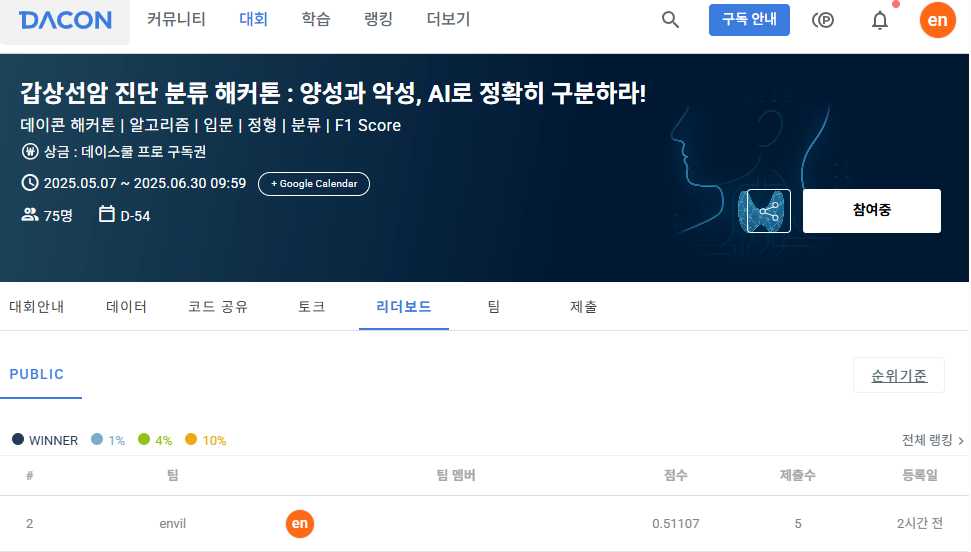

In [55]:
from IPython.display import Image
Image(r"C:\Users\302-15\Desktop\데이콘 갑상선 암 양성과 악성 분류\스크린샷 2025-05-07 141905.png") 

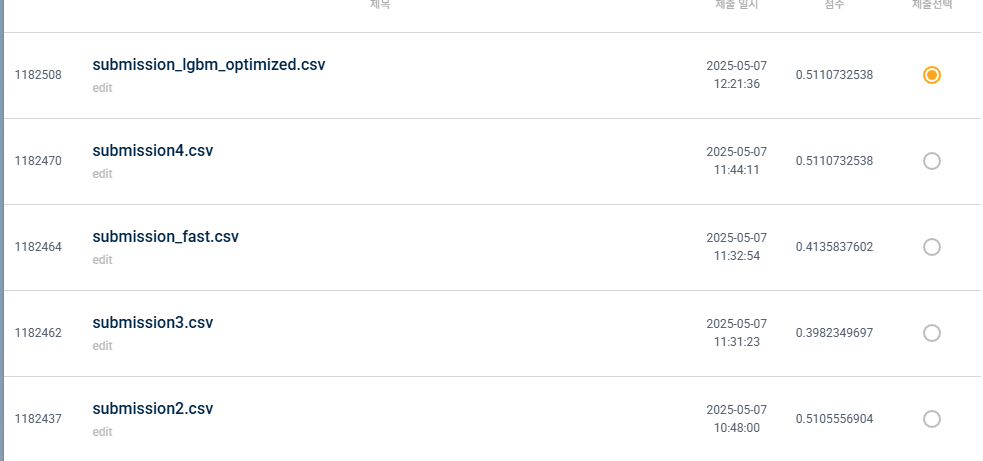

In [54]:
from IPython.display import Image
Image(r"C:\Users\302-15\Desktop\데이콘 갑상선 암 양성과 악성 분류\스크린샷 2025-05-07 145927.png") 